In [1]:
import numpy as np
from sklearn import svm

import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns

from matplotlib import cm
from celluloid import Camera

In [83]:
limInfX, limSupX = 0, 50
limInfY, limSupY = 0, 50

mean_x, mean_y = (limSupX - limInfX)/2, (limSupY - limInfY)/2
r1, r2 = 8, 12

scale = 1000
training_m = int(0.8 * scale)
normal_m = int(0.1 * scale)
abnormal_m = int(0.1 * scale)

nu = 0.0005

size_ = 15

In [84]:
# Observaciones de entrenamiento (en forma de donut)

x_train, y_train = [], []
for _ in range(training_m):
    length = np.sqrt(np.random.uniform(r1**2, r2**2))
    angle = np.pi * np.random.uniform(0, 1.75)

    x = mean_x + length * np.cos(angle)
    y = mean_y + length * np.sin(angle)
    
    x_train.append(x)
    y_train.append(y)

X_train = np.c_[x_train, y_train]

In [85]:
# Entrenamos el modelo
clf = svm.OneClassSVM(nu=nu, kernel="rbf", gamma=0.1)
clf.fit(X_train)

# Hacemos predicciones
y_train = clf.predict(X_train)

In [86]:
xx, yy = np.meshgrid(np.linspace(limInfX, limSupX, (limSupX - limInfX)*10),
                     np.linspace(limInfY, limSupY, (limSupX - limInfX)*10))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Generamos la simulación

MovieWriter ffmpeg unavailable; using Pillow instead.


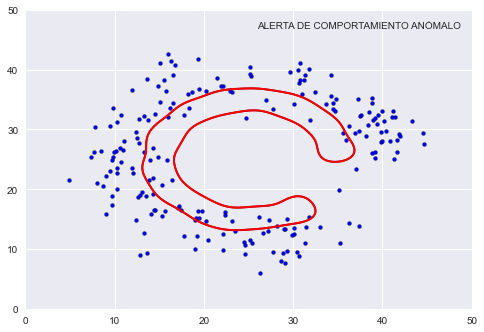

In [104]:
plt.style.use('seaborn')

colour = 'blue'
mov_module = 0.2
escape_module = 6
size_ = 15

camera = Camera(plt.figure())
sample_size = int(0.25 * training_m)
points = X_train[np.random.randint(X_train.shape[0], size=sample_size), :]

frames = 15
for _ in range(frames):
    mov_x = mov_module * np.random.randn(len(points))
    mov_y = mov_module * np.random.randn(len(points))
    movement = np.c_[mov_x, mov_y]
    
    points += movement
    plt.scatter(points[:, 0], points[:, 1], c=colour, s=size_, edgecolors='k')
    
    camera.snap()
    
frames = 15
for _ in range(frames):
    
    # Generamos movimiento aleatorio
    mov_x = mov_module * np.random.randn(len(points))
    mov_y = mov_module * np.random.randn(len(points))
    movement = np.c_[mov_x, mov_y]
    
    points += movement
    plt.scatter(points[:, 0], points[:, 1], c=colour, s=size_, edgecolors='k')
    
    # Graficamos las secciones en que la SVM considera una observación como "normal"
    a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    plt.contour(xx, yy, Z, levels=[0, Z.max()], colors='red')
    
    camera.snap()
    
frames = 5
for _ in range(frames):
    
    # Generamos movimiento aleatorio
    mov_x = mov_module * np.random.randn(len(points))
    mov_y = mov_module * np.random.randn(len(points))
    movement = np.c_[mov_x, mov_y]
    
    # Generamos movimiento alejándose del centro
    escape = escape_module * (points - [mean_x, mean_y]) * np.random.uniform() / np.linalg.norm(points - [mean_x, mean_y])
    
    points += escape
    points += movement
    plt.scatter(points[:, 0], points[:, 1], c=colour, s=size_, edgecolors='k')
    
    # Graficamos las secciones en que la SVM considera una observación como "normal"
    a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    plt.contour(xx, yy, Z, levels=[0, Z.max()], colors='red')
    
    camera.snap()

frames = 15
for j in range(frames):
    
    # Generamos movimiento aleatorio
    mov_x = mov_module * np.random.randn(len(points))
    mov_y = mov_module * np.random.randn(len(points))
    movement = np.c_[mov_x, mov_y]
    
    # Generamos movimiento alejándose del centro
    escape = escape_module * (points - [mean_x, mean_y]) * np.random.uniform() / np.linalg.norm(points - [mean_x, mean_y])
    
    points += escape
    points += movement
    plt.scatter(points[:, 0], points[:, 1], c=colour, s=size_, edgecolors='k')
    
    # Graficamos las secciones en que la SVM considera una observación como "normal"
    a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    plt.contour(xx, yy, Z, levels=[0, Z.max()], colors='red')
    
    # Agregamos etiqueta de alerta
    if j % 3:
        plt.text(26, 47, 'ALERTA DE COMPORTAMIENTO ANÓMALO')
    
    camera.snap()

    
anim = camera.animate(blit=True)
anim.save('animal_movement.gif')